# Wine clustering with Random Forest 

In [131]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
data = pd.read_csv('../data/final_wine_and_fire_data.csv')

In [3]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,points,price,province_id,variety_numerical,vintage,...,total_fires_current,sum_fire_size_current,norm_vintage,norm_variety_numerical,norm_price,norm_points,norm_total_fires,norm_sum_fire_size,norm_total_fires_current,norm_sum_fire_size_current
count,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.00000,9757.000000,9757.0,9757.000000,9757.000000,...,9757.000000,9757.00000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000,9757.000000
mean,4878.000000,17632.816542,17632.816542,62619.848929,65092.036487,89.97407,46.297018,7.0,360.879779,2012.819309,...,146.665983,3585.34697,0.010823,0.514074,0.020515,0.100748,0.331704,0.013330,0.327379,0.014038
std,2816.747622,10272.211048,10272.211048,36429.036487,37855.802096,2.73060,35.655901,0.0,203.704069,2.027649,...,72.144221,13675.78481,0.001006,0.290177,0.017713,0.027582,0.178448,0.053523,0.161036,0.053544
min,0.000000,0.000000,0.000000,10.000000,10.000000,80.00000,5.000000,7.0,0.000000,1991.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2439.000000,8764.000000,8764.000000,31202.000000,32432.000000,88.00000,28.000000,7.0,125.000000,2012.000000,...,120.000000,472.82000,0.010417,0.178063,0.011426,0.080808,0.256696,0.001539,0.267857,0.001851
50%,4878.000000,17856.000000,17856.000000,63393.000000,65904.000000,90.00000,40.000000,7.0,440.000000,2013.000000,...,136.000000,968.81000,0.010913,0.626781,0.017387,0.101010,0.325893,0.005246,0.303571,0.003793
75%,7317.000000,26569.000000,26569.000000,94586.000000,98307.000000,92.00000,55.000000,7.0,475.000000,2014.000000,...,196.000000,1453.08000,0.011409,0.676638,0.024839,0.121212,0.450893,0.006877,0.437500,0.005689
max,9756.000000,35419.000000,35419.000000,125084.000000,129950.000000,99.00000,2013.000000,7.0,702.000000,2016.000000,...,448.000000,255410.40000,0.012401,1.000000,0.997516,0.191919,1.000000,1.000000,1.000000,1.000000


In [22]:
names_col = [data.columns]
for i in range(len(names_col)):
    print names_col[i]

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1.1', u'Unnamed: 0.1.1.1',
       u'Unnamed: 0.1.1.1.1', u'country', u'description', u'designation',
       u'points', u'price', u'province', u'region_1', u'region_2',
       u'taster_name', u'taster_twitter_handle', u'title', u'variety',
       u'winery', u'province_id', u'variety_numerical', u'vintage', u'lat',
       u'lon', u'total_fires', u'sum_fire_size', u'total_fires_current',
       u'sum_fire_size_current', u'norm_vintage', u'norm_variety_numerical',
       u'norm_price', u'norm_points', u'norm_total_fires',
       u'norm_sum_fire_size', u'norm_total_fires_current',
       u'norm_sum_fire_size_current', u'point_bin'],
      dtype='object')


In [55]:
len(data.taster_twitter_handle.unique().sum())


75

In [56]:
ref_dict = {}
for i, x in enumerate(data.taster_twitter_handle.unique()):
    print x, i
    ref_dict.update({x: i})
data['taster_twitter_handle_id'] = data['taster_twitter_handle'].replace(to_replace=ref_dict,)

@vboone 0
@mattkettmann 1
@vossroger 2
@gordone_cellars 3
@JoeCz 4
@paulgwine  5
@wineschach 6


In [21]:
points = data.loc[:,'points']
points = np.array(points, dtype=pd.Series)
points = points.reshape(-1, 1)
cluster = KMeans(n_clusters = 3, random_state = 0).fit(points)
point_bins = cluster.labels_

data['point_bin'] = point_bins

(array([5.000e+00, 0.000e+00, 6.000e+00, 0.000e+00, 0.000e+00, 3.800e+01,
        0.000e+00, 0.000e+00, 7.100e+01, 0.000e+00, 1.550e+02, 0.000e+00,
        0.000e+00, 2.890e+02, 0.000e+00, 0.000e+00, 5.410e+02, 0.000e+00,
        7.540e+02, 0.000e+00, 0.000e+00, 1.204e+03, 0.000e+00, 0.000e+00,
        6.690e+02, 0.000e+00, 1.595e+03, 0.000e+00, 0.000e+00, 1.370e+03,
        0.000e+00, 0.000e+00, 1.200e+03, 0.000e+00, 1.024e+03, 0.000e+00,
        0.000e+00, 5.830e+02, 0.000e+00, 0.000e+00, 1.920e+02, 0.000e+00,
        4.000e+01, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00]),
 array([80.        , 80.37254902, 80.74509804, 81.11764706, 81.49019608,
        81.8627451 , 82.23529412, 82.60784314, 82.98039216, 83.35294118,
        83.7254902 , 84.09803922, 84.47058824, 84.84313725, 85.21568627,
        85.58823529, 85.96078431, 86.33333333, 86.70588235, 87.07843137,
        87.45098039, 87.82352941, 88.19607843, 88.56862745, 88.94117647,


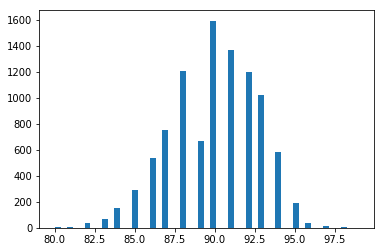

In [6]:
plt.hist(data['points'], bins='auto') 

In [112]:
X=data[['variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 'norm_sum_fire_size_current','lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 'norm_sum_fire_size']]  # Features
y=data['point_bin']  # Labels
x_name = (['variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 'norm_sum_fire_size_current', 'lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 'norm_sum_fire_size'])


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [114]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [115]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.5416666666666666)


In [117]:
feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

norm_price                    0.448609
variety_numerical             0.207157
lon                           0.064835
lat                           0.063788
norm_total_fires              0.041760
norm_sum_fire_size_current    0.039249
norm_total_fires_current      0.039154
norm_sum_fire_size            0.038489
norm_vintage                  0.029880
taster_twitter_handle_id      0.027079
dtype: float64

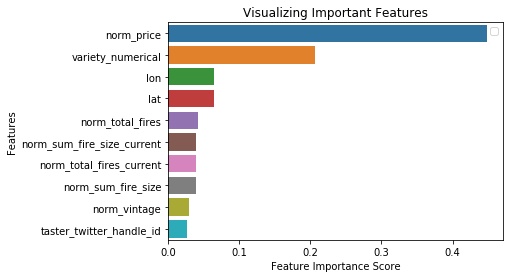

In [119]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [120]:
data['correlation_coeff'] = ((data.norm_price*.4568)**4 + (data.variety_numerical*.207)**3 + (data.lon*.0642)**2 + data.lat*.0622)

In [121]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['norm_price', 'variety_numerical','correlation_coeff']]  # Removed feature "sepal length"
y=data['point_bin']  
x_name = (['norm_price', 'variety_numerical','correlation_coeff'])
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [122]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.4767203513909224)


In [123]:
feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

norm_price           0.522385
correlation_coeff    0.380367
variety_numerical    0.097248
dtype: float64

In [124]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.4796486090775988)


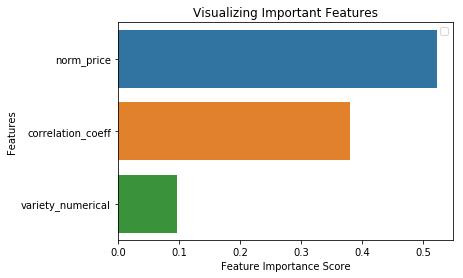

In [125]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

('Accuracy:', 0.5058565153733529)
('Accuracy:', 0.5101024890190337)


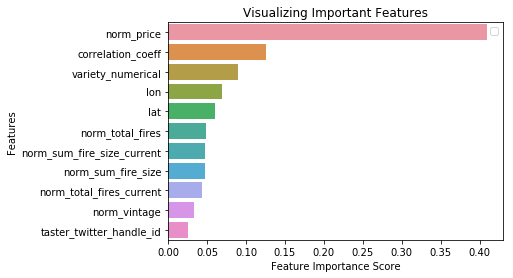

In [129]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['correlation_coeff', 'variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 'norm_sum_fire_size_current','lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 'norm_sum_fire_size']]  # Features
y=data['point_bin']  # Labels
x_name = (['correlation_coeff', 'variety_numerical', 'norm_price', 'norm_vintage', 'norm_total_fires_current', 'norm_sum_fire_size_current', 'lat', 'lon', 'taster_twitter_handle_id', 'norm_total_fires', 'norm_sum_fire_size'])

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [153]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_mat, range(3), range(3))
conf_mat

array([[1241,  257,  609],
       [ 309, 1121,  694],
       [ 759,  718, 1122]])

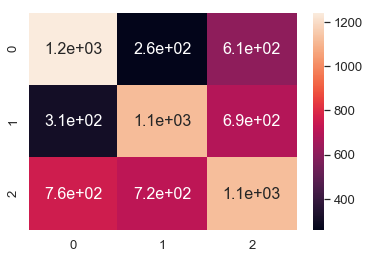

In [151]:
sns.set(font_scale=1.2)#for label size
sns.heatmap(conf_mat, annot=True,annot_kws={"size": 16})# font size


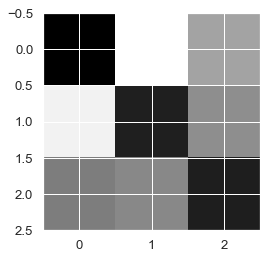

In [150]:
plt.imshow(conf_mat, cmap='binary')

In [152]:
data.to_csv('../data/final_wine_and_fire_tiwitter_id.csv')